In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [3]:
Customer_data=pd.read_csv('Mall_customers.csv')

# Data Exploration

In [4]:
Customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
Customer_data.set_index('CustomerID', inplace=True)

In [6]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
Customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
Selected= Customer_data.iloc[:,[2,3]].values #selecting the annual income and spending score

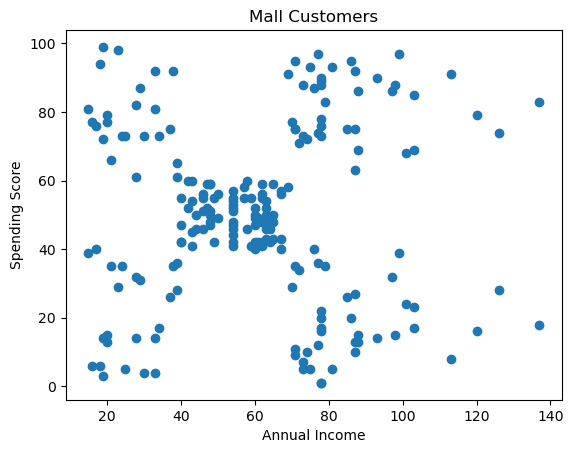

In [9]:
plt.scatter(Selected[:,0],Selected[:,1])
plt.title('Mall Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Data Insights

<Axes: xlabel='Age', ylabel='Count'>

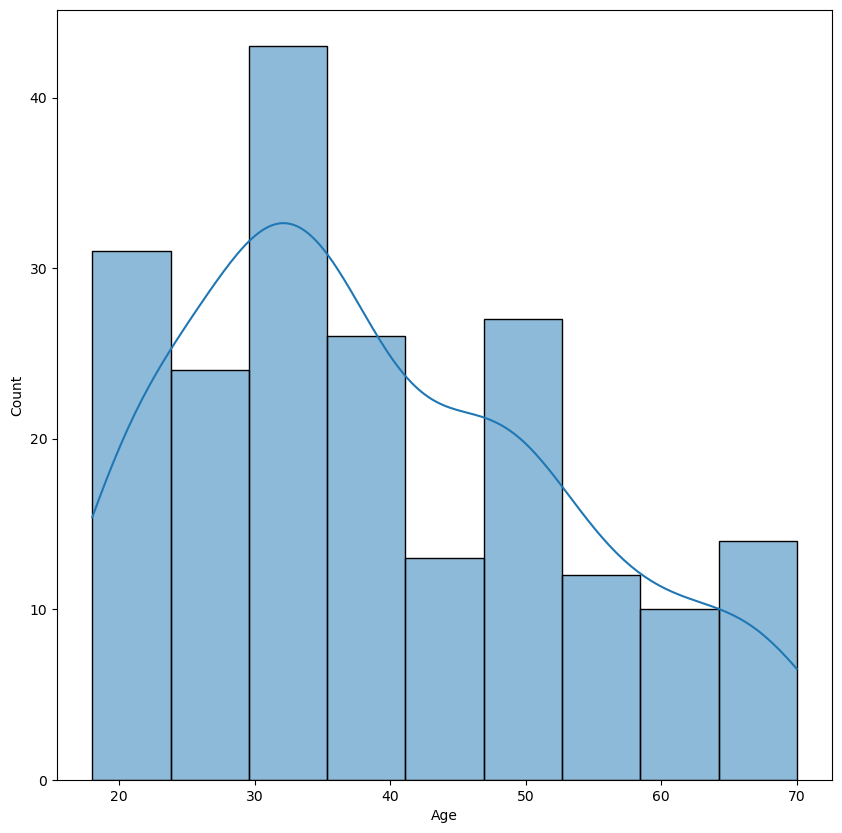

In [10]:
plt.figure(figsize=(10,10))
sns.histplot(Customer_data['Age'],kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

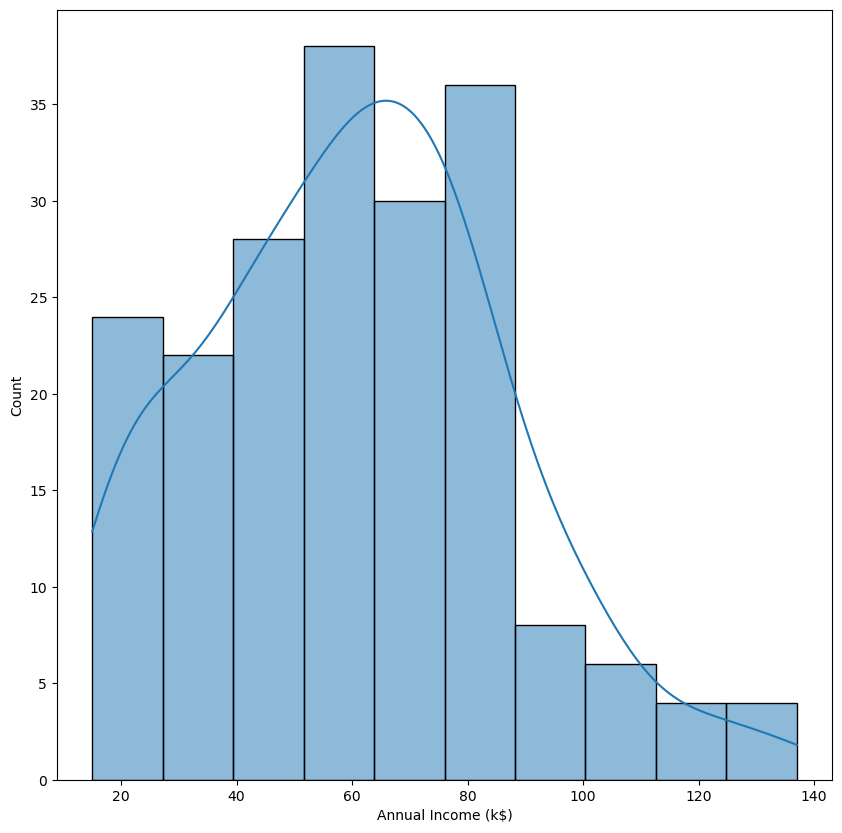

In [11]:
plt.figure(figsize=(10,10))
sns.histplot(Customer_data['Annual Income (k$)'],kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

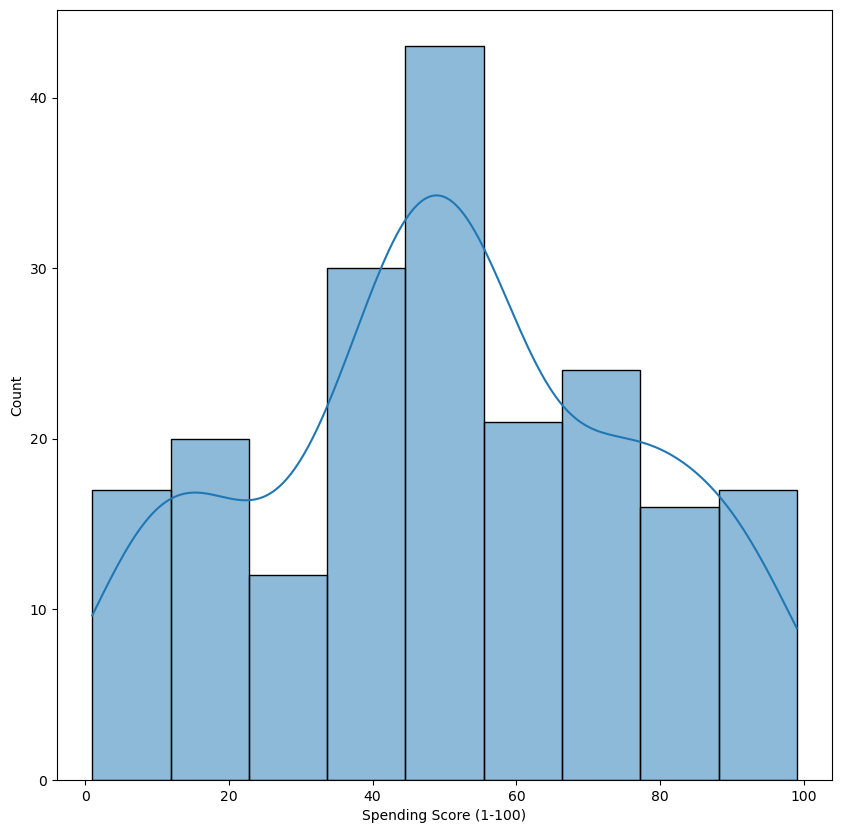

In [12]:
plt.figure(figsize=(10,10))
sns.histplot(Customer_data['Spending Score (1-100)'],kde=True)

<Axes: >

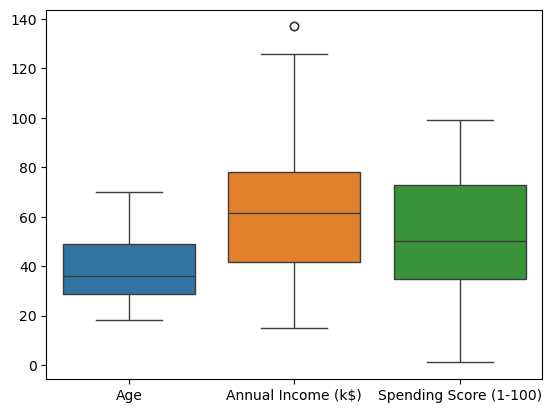

In [13]:
sns.boxplot(Customer_data)

# Preparing the data for the Model

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Selected = scaler.fit_transform(Selected)

# Model Training & Predicting 

In [15]:
from sklearn.cluster import KMeans

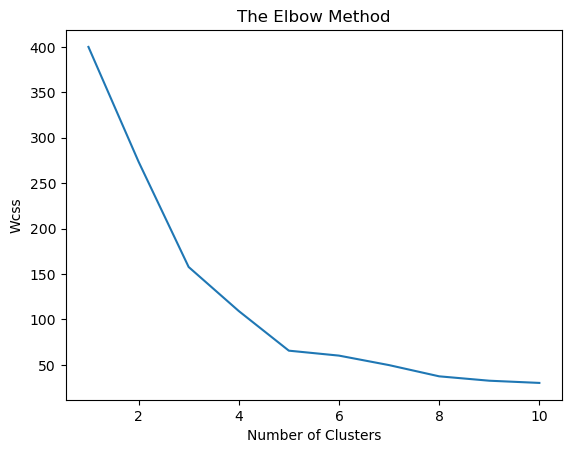

In [16]:
Wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=42)
    kmeans.fit(Selected)
    Wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),Wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++', random_state=42)

In [18]:
y_kmeans = kmeans.fit_predict(Selected)

In [19]:
customers_clustered = Customer_data.copy()
customers_clustered['Clusters'] = y_kmeans
customers_clustered

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4
...,...,...,...,...,...
196,Female,35,120,79,1
197,Female,45,126,28,3
198,Male,32,126,74,1


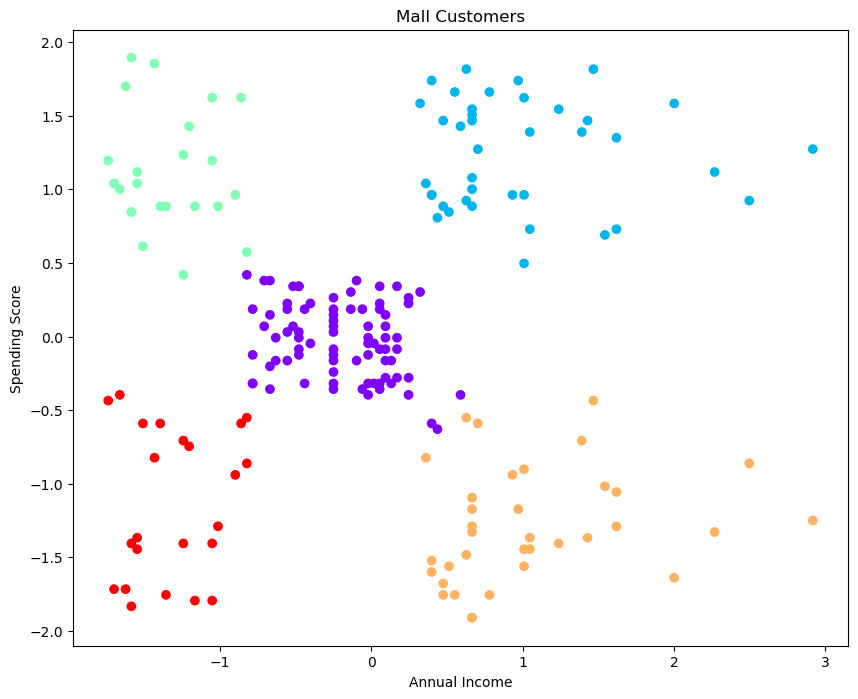

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(Selected[:,0],Selected[:,1],c=  kmeans.labels_, cmap='rainbow')
plt.title('Mall Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Red Cluster: Low Income, Low Spending
This segment consists of budget-conscious customers with minimal spending. They are typically not a primary target for premium marketing efforts.

### Light Green Cluster: Low Income, High Spending
These customers are "Value Seekers" or "Enthusiastic Shoppers." Despite a lower income, they represent high spending activity.

### Purple Cluster: Medium Income, Medium Spending
Representing the average mall shopper, this group has a balanced approach to income and spending, forming a reliable core customer base.

### Orange Cluster: High Income, Low Spending
This segment comprises wealthy customers who currently spend conservatively. They represent a significant opportunity, as targeted offers could unlock their spending potential.

### Blue Cluster: High Income, High Spending
The most valuable "VIP Segment." These are the ideal customers with high income and high spending, deserving of exclusive treatment and loyalty programs.